In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split
import scipy.stats as stats


In [2]:
data=pd.read_csv('winequality-red.csv',sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [4]:
data.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
for i in data.columns:
    print(f'{i} has {len(data[i].unique())} unique values ')

fixed acidity has 96 unique values 
volatile acidity has 143 unique values 
citric acid has 80 unique values 
residual sugar has 91 unique values 
chlorides has 153 unique values 
free sulfur dioxide has 60 unique values 
total sulfur dioxide has 144 unique values 
density has 436 unique values 
pH has 89 unique values 
sulphates has 96 unique values 
alcohol has 65 unique values 
quality has 6 unique values 


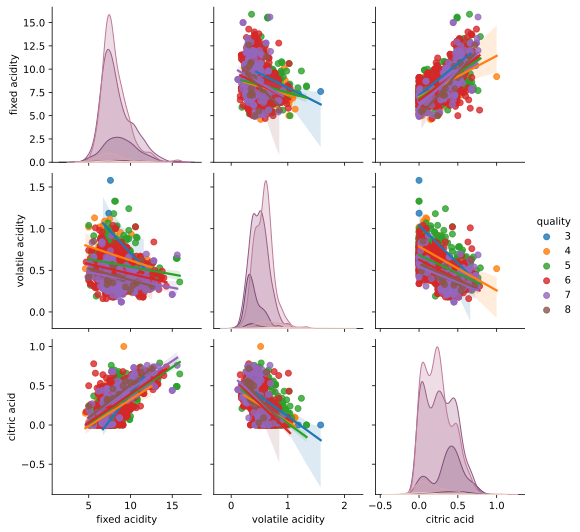

In [7]:
cols2plot=['fixed acidity','volatile acidity', 'citric acid', 'quality']
sns.pairplot(data[cols2plot],kind='reg',hue='quality')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'fixed acidity'),
  Text(1, 0, 'volatile acidity'),
  Text(2, 0, 'citric acid'),
  Text(3, 0, 'residual sugar'),
  Text(4, 0, 'chlorides'),
  Text(5, 0, 'free sulfur dioxide'),
  Text(6, 0, 'total sulfur dioxide'),
  Text(7, 0, 'density'),
  Text(8, 0, 'pH'),
  Text(9, 0, 'sulphates'),
  Text(10, 0, 'alcohol'),
  Text(11, 0, 'quality')])

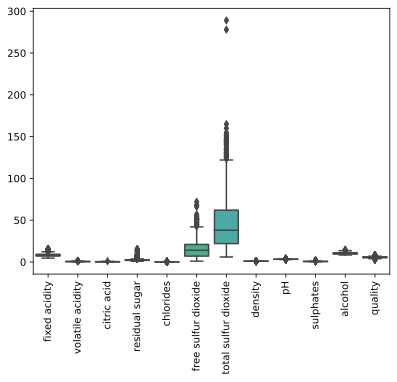

In [8]:

sns.boxplot(data)
plt.xticks(rotation=90)

In [9]:
data=data[data['total sulfur dioxide']<200]
X=data.drop('quality',axis=1)


In [10]:
y=data.quality

In [11]:
X=X.apply(stats.zscore)
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03
mean,3.559388e-17,1.245786e-16,1.779694e-17,-9.788316e-17,-1.423755e-16,8.898469e-18,-5.339081e-17,-8.361001e-14,3.025479e-16,8.898469e-17,-5.695020e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.136087e+00,-2.280762e+00,-1.391823e+00,-1.169149e+00,-1.604575e+00,-1.422837e+00,-1.262581e+00,-3.546932e+00,-3.709380e+00,-1.937318e+00,-1.899221e+00
25%,-7.006076e-01,-7.718255e-01,-9.286769e-01,-4.525789e-01,-3.721412e-01,-8.478700e-01,-7.596977e-01,-6.111392e-01,-6.587444e-01,-6.392206e-01,-8.653154e-01
50%,-2.412541e-01,-4.530063e-02,-5.384522e-02,-2.376079e-01,-1.809014e-01,-1.770746e-01,-2.568145e-01,-6.216372e-04,-9.673073e-03,-2.261897e-01,-2.073755e-01
75%,5.051954e-01,6.253377e-01,7.695258e-01,4.902022e-02,5.283609e-02,4.937208e-01,4.975104e-01,5.780428e-01,5.744912e-01,4.228588e-01,6.385471e-01
max,4.352281e+00,5.878672e+00,3.754246e+00,9.292776e+00,1.112349e+01,5.380944e+00,3.734821e+00,3.683719e+00,4.533826e+00,7.916418e+00,4.210221e+00


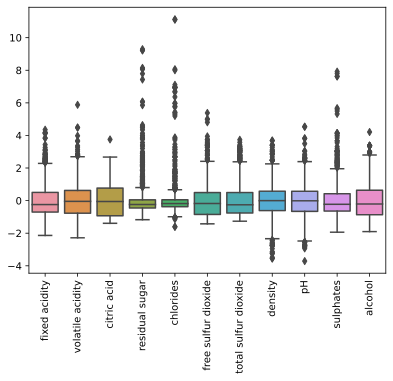

In [12]:
sns.boxplot(X)
plt.xticks(rotation=90)
plt.show()

In [13]:
y=y.to_frame()
y.shape

(1597, 1)

<Axes: xlabel='quality'>

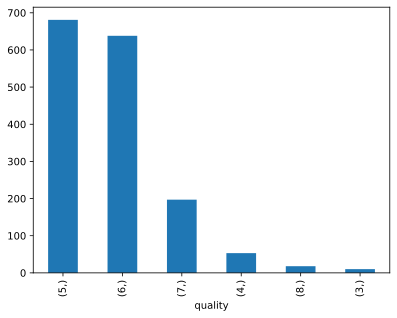

In [14]:
y.value_counts().plot(kind='bar')

In [15]:
data['boolQuality']=0

/tmp/ipykernel_3385/2334135202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['boolQuality']=0


In [16]:
data[np.where(data.quality>5)]

InvalidIndexError: (array([   3,    7,    8,   16,   19,   20,   24,   29,   31,   33,   35,
         36,   37,   42,   51,   52,   54,   59,   62,   69,   70,   77,
         84,   86,   91,   95,   99,  100,  101,  102,  108,  113,  115,
        116,  117,  118,  119,  121,  128,  133,  134,  142,  144,  148,
        149,  150,  159,  162,  168,  171,  172,  173,  177,  184,  191,
        197,  198,  200,  204,  205,  206,  209,  210,  211,  212,  214,
        220,  223,  225,  226,  228,  230,  231,  232,  234,  235,  236,
        237,  238,  239,  241,  242,  243,  244,  245,  248,  249,  250,
        251,  254,  259,  265,  267,  268,  269,  270,  271,  275,  276,
        277,  278,  279,  280,  281,  283,  286,  287,  288,  290,  292,
        293,  294,  300,  301,  305,  307,  308,  309,  310,  311,  312,
        315,  317,  318,  319,  320,  323,  324,  325,  326,  328,  330,
        331,  332,  334,  335,  336,  338,  339,  340,  341,  342,  343,
        344,  346,  347,  348,  349,  350,  351,  354,  355,  357,  358,
        359,  361,  364,  365,  366,  369,  371,  372,  374,  375,  376,
        377,  378,  379,  380,  381,  382,  383,  385,  386,  387,  388,
        389,  390,  391,  395,  397,  398,  401,  402,  403,  405,  406,
        407,  408,  410,  413,  416,  418,  420,  421,  423,  425,  426,
        427,  429,  430,  432,  434,  436,  437,  438,  440,  441,  442,
        443,  444,  445,  448,  449,  450,  451,  452,  453,  455,  458,
        460,  464,  466,  467,  468,  471,  472,  474,  477,  479,  481,
        484,  487,  488,  489,  490,  491,  492,  493,  494,  495,  496,
        498,  499,  500,  501,  502,  503,  504,  505,  506,  507,  508,
        509,  511,  512,  513,  514,  516,  518,  520,  527,  528,  530,
        533,  534,  535,  537,  538,  541,  543,  544,  546,  547,  548,
        549,  550,  551,  552,  556,  558,  559,  563,  564,  566,  567,
        568,  569,  570,  571,  574,  575,  579,  583,  584,  585,  586,
        588,  589,  591,  596,  597,  598,  599,  601,  603,  604,  605,
        606,  607,  608,  609,  612,  614,  617,  623,  628,  630,  632,
        638,  639,  645,  648,  649,  653,  657,  658,  660,  662,  663,
        666,  667,  669,  674,  676,  681,  695,  696,  697,  699,  700,
        701,  702,  708,  709,  715,  726,  729,  737,  740,  745,  746,
        748,  749,  754,  755,  756,  762,  764,  765,  768,  770,  773,
        774,  776,  777,  780,  787,  788,  790,  792,  794,  797,  798,
        799,  802,  803,  804,  805,  806,  807,  809,  811,  814,  816,
        817,  821,  826,  828,  829,  831,  836,  837,  838,  840,  842,
        844,  847,  853,  854,  855,  856,  857,  858,  859,  861,  866,
        867,  868,  869,  870,  873,  874,  875,  877,  878,  881,  882,
        884,  886,  887,  888,  892,  894,  895,  896,  897,  898,  901,
        902,  903,  904,  907,  908,  909,  910,  911,  912,  913,  914,
        915,  917,  918,  919,  921,  922,  923,  925,  926,  929,  932,
        935,  936,  938,  940,  941,  942,  943,  944,  945,  946,  947,
        948,  949,  950,  951,  952,  953,  954,  956,  957,  958,  960,
        963,  964,  965,  966,  968,  970,  971,  972,  974,  978,  980,
        982,  983,  985,  986,  989,  992,  995,  996,  997,  998,  999,
       1000, 1001, 1002, 1003, 1005, 1006, 1007, 1008, 1010, 1011, 1013,
       1014, 1015, 1016, 1017, 1018, 1020, 1021, 1023, 1024, 1025, 1026,
       1028, 1029, 1030, 1031, 1033, 1034, 1035, 1036, 1038, 1039, 1041,
       1042, 1043, 1044, 1045, 1046, 1048, 1049, 1053, 1054, 1055, 1056,
       1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068,
       1070, 1072, 1073, 1075, 1076, 1079, 1080, 1081, 1082, 1084, 1085,
       1086, 1087, 1088, 1089, 1090, 1091, 1092, 1094, 1096, 1098, 1099,
       1100, 1101, 1102, 1104, 1105, 1107, 1108, 1109, 1110, 1111, 1112,
       1113, 1114, 1115, 1116, 1118, 1119, 1120, 1121, 1123, 1124, 1125,
       1127, 1128, 1130, 1131, 1132, 1133, 1134, 1135, 1137, 1138, 1139,
       1140, 1141, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1151, 1152,
       1154, 1155, 1156, 1158, 1159, 1160, 1165, 1166, 1167, 1168, 1169,
       1170, 1171, 1172, 1173, 1175, 1177, 1178, 1180, 1183, 1185, 1188,
       1190, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1202,
       1203, 1204, 1206, 1207, 1208, 1210, 1211, 1212, 1213, 1214, 1215,
       1216, 1217, 1218, 1219, 1220, 1221, 1222, 1226, 1228, 1232, 1234,
       1235, 1240, 1242, 1246, 1247, 1248, 1255, 1256, 1257, 1262, 1263,
       1264, 1265, 1266, 1267, 1268, 1269, 1272, 1273, 1275, 1276, 1277,
       1278, 1279, 1280, 1281, 1284, 1289, 1290, 1292, 1295, 1296, 1298,
       1299, 1300, 1309, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1319,
       1321, 1322, 1323, 1324, 1325, 1327, 1328, 1330, 1333, 1337, 1338,
       1339, 1340, 1341, 1343, 1349, 1355, 1357, 1360, 1362, 1365, 1366,
       1369, 1375, 1376, 1377, 1378, 1388, 1393, 1396, 1397, 1400, 1401,
       1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1415, 1420,
       1422, 1423, 1424, 1429, 1430, 1431, 1432, 1433, 1437, 1438, 1439,
       1442, 1443, 1447, 1448, 1449, 1450, 1452, 1453, 1454, 1457, 1458,
       1460, 1461, 1464, 1466, 1470, 1473, 1475, 1487, 1488, 1492, 1493,
       1495, 1496, 1497, 1501, 1502, 1504, 1505, 1506, 1508, 1510, 1511,
       1512, 1513, 1515, 1518, 1522, 1524, 1525, 1526, 1527, 1528, 1530,
       1532, 1533, 1534, 1535, 1538, 1539, 1540, 1541, 1542, 1543, 1547,
       1550, 1552, 1553, 1555, 1563, 1564, 1567, 1568, 1569, 1571, 1572,
       1573, 1574, 1575, 1576, 1578, 1582, 1583, 1584, 1585, 1586, 1588,
       1589, 1590, 1591, 1593, 1594, 1596]),)

In [17]:
data.loc[data['quality']>5,'boolQuality']=1

In [18]:
X.values

array([[-0.52835005,  0.96065692, -1.39182311, ...,  1.28846965,
        -0.58021615, -0.9593068 ],
       [-0.29867328,  1.96661447, -1.39182311, ..., -0.72365157,
         0.12783672, -0.58334117],
       [-0.29867328,  1.2959761 , -1.18598036, ..., -0.33420875,
        -0.0491765 , -0.58334117],
       ...,
       [-1.15996117, -0.10118717, -0.72283417, ...,  0.70430542,
         0.54086757,  0.54455574],
       [-1.38963794,  0.653281  , -0.77429485, ...,  1.67791246,
         0.30484994, -0.20737553],
       [-1.33221875, -1.21891778,  1.02682924, ...,  0.50958401,
         0.00982791,  0.54455574]])

<Axes: xlabel='boolQuality'>

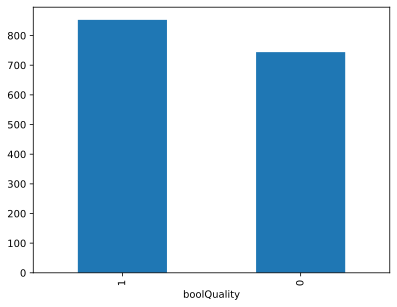

In [19]:
data.boolQuality.value_counts().plot(kind='bar')

In [20]:
Xt=torch.tensor(X.values).float()
yt=torch.tensor(data.boolQuality.values).float()
print(Xt.shape)
print(yt.shape)

torch.Size([1597, 11])
torch.Size([1597])


In [21]:
yt=yt[:,None]
print(yt.shape)

torch.Size([1597, 1])


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
Xt, yt, test_size=0.3, random_state=42)
train_data=TensorDataset(X_train,y_train)
test_data=TensorDataset(X_test,y_test)



In [23]:
def createANNmodel():
    ANNwine=nn.Sequential(nn.Linear(11,32),
                         nn.ReLU(),
                         nn.Linear(32,32),
                         nn.ReLU(),
                          nn.Linear(32,32),
                        

                         nn.Linear(32,1),   
                         )
    lossfun=nn.BCEWithLogitsLoss()
    optimizer=torch.optim.SGD(ANNwine.parameters(),lr=0.001)
    return ANNwine,lossfun,optimizer

In [24]:
numepochs=500
def trainModel():
    trainAcc=[]
    testAcc=[]
    losses=[]
    for epochi in range(numepochs):
        ANNwine.train()
        batchAcc=[]
        batchLoss=[]
        for X,y in train_loader:
            yHat=ANNwine(X)
            loss=lossfun(yHat,y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            batchAcc.append(100*torch.mean(((yHat>0)==y).float()).item())
            batchLoss.append(loss.item())
            
        trainAcc.append(np.mean(batchAcc))
        losses.append(np.mean(batchLoss))
        
        X,y=next(iter(test_loader))
        ANNwine.eval()
        with torch.no_grad():
           
            
        
            testAcc.append(100*torch.mean(((ANNwine(X)>0)==y).float()).item())
        
    return trainAcc,testAcc,losses
            

In [122]:
batchsizes=2**np.arange(1,7)
accuracyResultsTrain=np.zeros((numepochs,len(batchsizes)))
accuracyResultsTest=np.zeros((numepochs,len(batchsizes)))
test_loader=DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])
for bi in range(len(batchsizes)):
    train_loader=DataLoader(train_data,batch_size=int(batchsizes[bi]), shuffle=True,drop_last=True)
    
    ANNwine,lossfun,optimizer=createANNmodel()
    trainAcc,testAcc,losses=trainModel()
    accuracyResultsTrain[:,bi]=trainAcc
    accuracyResultsTest[:,bi]=testAcc
    
    


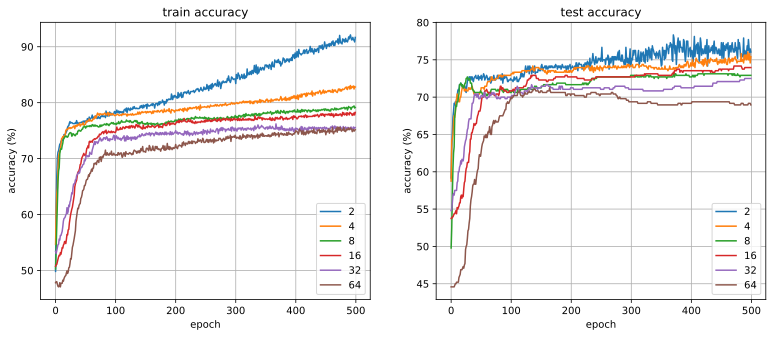

In [60]:
fig,ax=plt.subplots(1,2,figsize=(13,5))
ax[0].plot(accuracyResultsTrain)
ax[0].set_title('train accuracy')
ax[1].plot(accuracyResultsTest)
ax[1].set_title('test accuracy')
for i in range(2):
    ax[i].legend(batchsizes)
    ax[i].set_xlabel('epoch')
    ax[i].set_ylabel('accuracy (%)')
    ax[i].grid()
#     with zscore
    

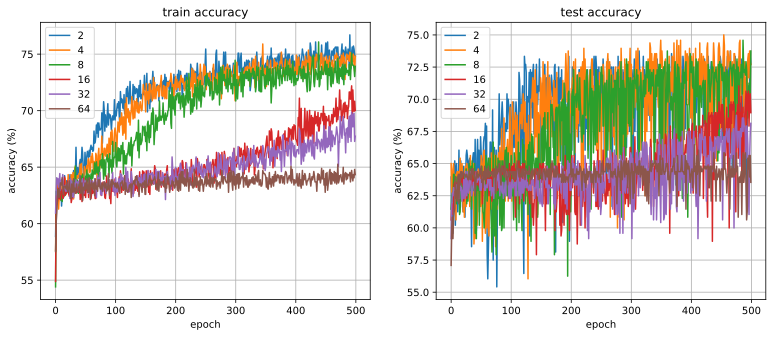

In [93]:
fig,ax=plt.subplots(1,2,figsize=(13,5))
ax[0].plot(accuracyResultsTrain)
ax[0].set_title('train accuracy')
ax[1].plot(accuracyResultsTest)
ax[1].set_title('test accuracy')
for i in range(2):
    ax[i].legend(batchsizes)
    ax[i].set_xlabel('epoch')
    ax[i].set_ylabel('accuracy (%)')
    ax[i].grid()
#     without zscore

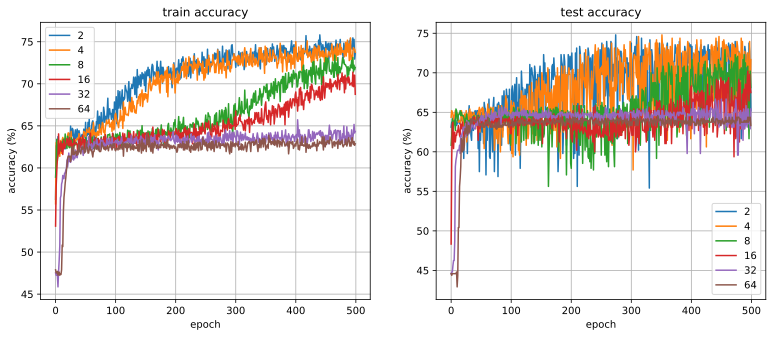

In [123]:
fig,ax=plt.subplots(1,2,figsize=(13,5))
ax[0].plot(accuracyResultsTrain)
ax[0].set_title('train accuracy')
ax[1].plot(accuracyResultsTest)
ax[1].set_title('test accuracy')
for i in range(2):
    ax[i].legend(batchsizes)
    ax[i].set_xlabel('epoch')
    ax[i].set_ylabel('accuracy (%)')
    ax[i].grid()
#     with zscore
#     model with 2 hidden layers(instead of 1) but half width (32 instead of 64 units )